In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [51]:
heart_dataset = pd.read_csv(r'C:\Users\hp\Desktop\Major_project\ChronicDiseasePrediction\heart_disease\heart.csv')

In [52]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [53]:
heart_dataset.shape

(1025, 14)

In [54]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [55]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [57]:
heart_dataset["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

In [58]:
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [59]:
dataset = heart_dataset

In [60]:
medianTrestbps = heart_dataset["trestbps"].median()
medianThalach  = heart_dataset["thalach"].median()

In [61]:
heart_dataset["trestbps"].replace(np.nan,medianTrestbps,inplace=True)
heart_dataset["thalach"].replace(np.nan,medianThalach,inplace=True)

In [62]:
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [63]:
duplicateValues = heart_dataset.duplicated()
print(duplicateValues)
print(duplicateValues.sum())
heart_dataset[duplicateValues]

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool
723


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [65]:
heart_dataset.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<AxesSubplot:>

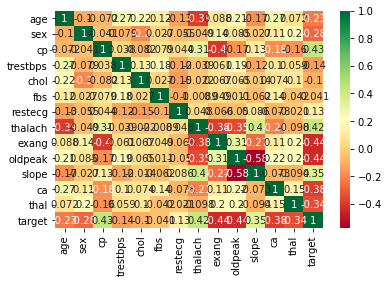

In [66]:
sns.heatmap(heart_dataset.corr(),annot=True,cmap="RdYlGn")

<function matplotlib.pyplot.show(close=None, block=None)>

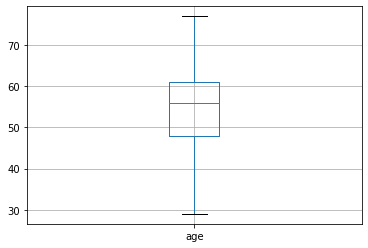

In [67]:
heart_dataset.boxplot(column=["age"])
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

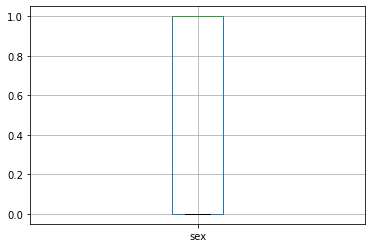

In [68]:
heart_dataset.boxplot(column=["sex"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

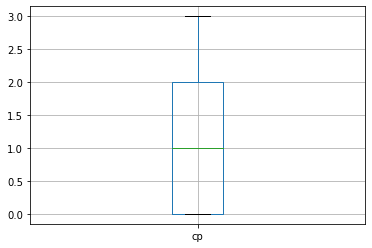

In [69]:
heart_dataset.boxplot(column=["cp"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

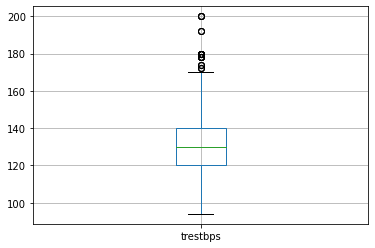

In [70]:
heart_dataset.boxplot(column=["trestbps"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

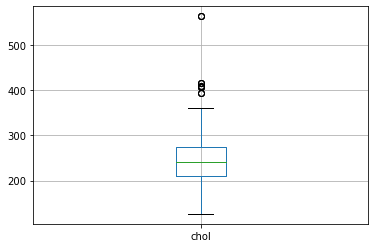

In [71]:
heart_dataset.boxplot(column=["chol"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

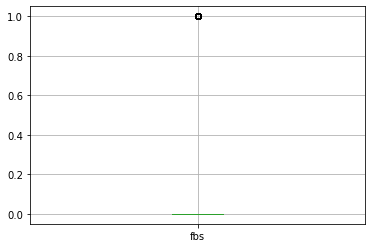

In [72]:
heart_dataset.boxplot(column=["fbs"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

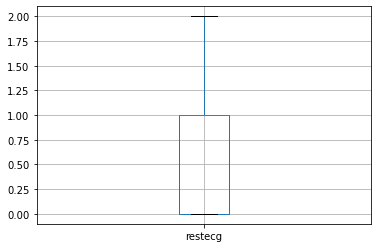

In [73]:
heart_dataset.boxplot(column=["restecg"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

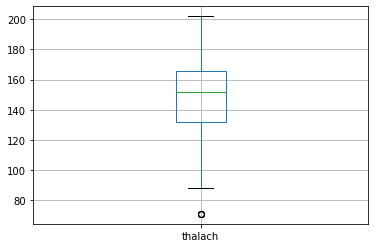

In [74]:
heart_dataset.boxplot(column=["thalach"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

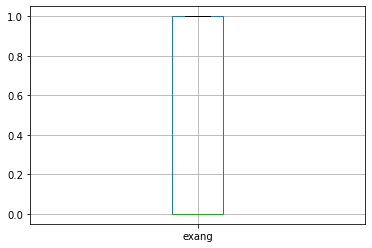

In [75]:
heart_dataset.boxplot(column=["exang"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

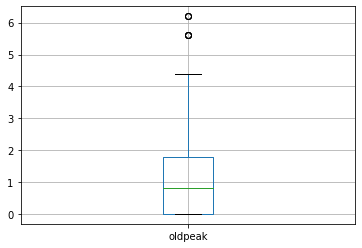

In [76]:
heart_dataset.boxplot(column=["oldpeak"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

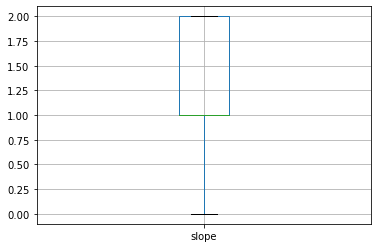

In [77]:
heart_dataset.boxplot(column=["slope"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

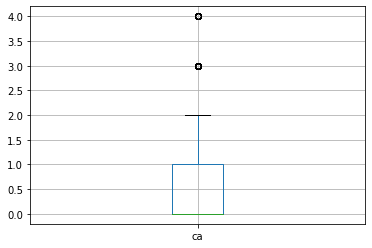

In [78]:
heart_dataset.boxplot(column=["ca"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

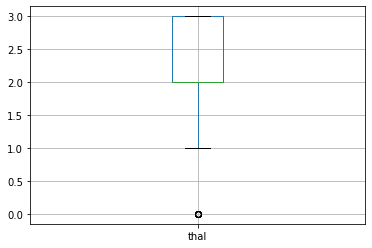

In [79]:
heart_dataset.boxplot(column=["thal"])
plt.show

In [80]:
def removeOutlier(col):
    sorted(col)
    q1,q3 = col.quantile([0.25,0.75])
    IQR = q3-q1
    lowerLimit = q1-(1.5*IQR)
    upperLimit = q3+(1.5*IQR)
    return lowerLimit,upperLimit


In [25]:
lowCp,highCp = removeOutlier(heart_dataset["cp"])
heart_dataset["cp"] = np.where(heart_dataset["cp"]>highCp,highCp,heart_dataset["cp"])
heart_dataset["cp"] = np.where(heart_dataset["cp"]<lowCp,lowCp,heart_dataset["cp"])

<function matplotlib.pyplot.show(close=None, block=None)>

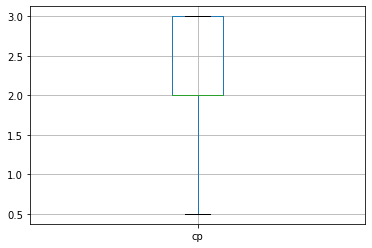

In [26]:
heart_dataset.boxplot(column=["cp"])
plt.show

In [27]:
lowtrestbps,hightrestbps = removeOutlier(heart_dataset["trestbps"])
heart_dataset["trestbps"] = np.where(heart_dataset["trestbps"]>hightrestbps,hightrestbps,heart_dataset["trestbps"])
heart_dataset["trestbps"] = np.where(heart_dataset["trestbps"]<lowtrestbps,lowtrestbps,heart_dataset["trestbps"])

<function matplotlib.pyplot.show(close=None, block=None)>

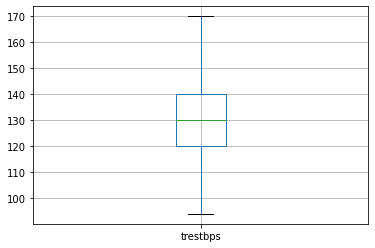

In [28]:
heart_dataset.boxplot(column=["trestbps"])
plt.show

In [29]:
lowchol,highchol = removeOutlier(heart_dataset["chol"])
heart_dataset["chol"] = np.where(heart_dataset["chol"]>highchol,highchol,heart_dataset["chol"])
heart_dataset["chol"] = np.where(heart_dataset["chol"]<lowchol,lowchol,heart_dataset["chol"])

<function matplotlib.pyplot.show(close=None, block=None)>

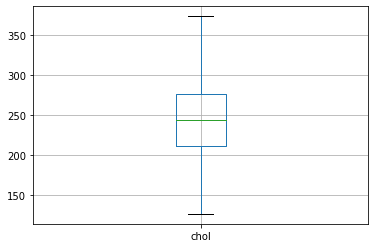

In [30]:
heart_dataset.boxplot(column=["chol"])
plt.show

In [31]:
lowfbs,highfbs = removeOutlier(heart_dataset["fbs"])
heart_dataset["fbs"] = np.where(heart_dataset["fbs"]>highfbs,highfbs,heart_dataset["fbs"])
heart_dataset["fbs"] = np.where(heart_dataset["fbs"]<lowfbs,lowfbs,heart_dataset["fbs"])

<function matplotlib.pyplot.show(close=None, block=None)>

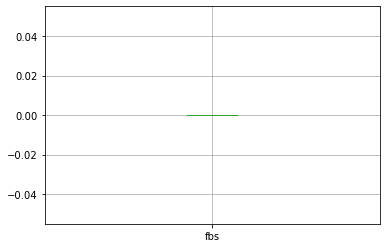

In [32]:
heart_dataset.boxplot(column=["fbs"])
plt.show

In [33]:
lowrestecg,highrestecg = removeOutlier(heart_dataset["restecg"])
heart_dataset["restecg"] = np.where(heart_dataset["restecg"]>highrestecg,highrestecg,heart_dataset["restecg"])
heart_dataset["restecg"] = np.where(heart_dataset["restecg"]<lowrestecg,lowrestecg,heart_dataset["restecg"])

<function matplotlib.pyplot.show(close=None, block=None)>

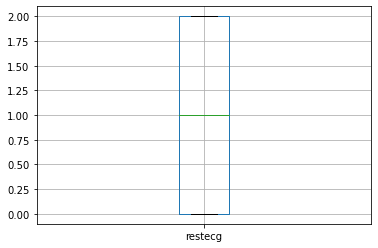

In [34]:
heart_dataset.boxplot(column=["restecg"])
plt.show

In [35]:
lowthalach,highthalach = removeOutlier(heart_dataset["thalach"])
heart_dataset["thalach"] = np.where(heart_dataset["thalach"]>highthalach,highthalach,heart_dataset["thalach"])
heart_dataset["thalach"] = np.where(heart_dataset["thalach"]<lowthalach,lowthalach,heart_dataset["thalach"])

<function matplotlib.pyplot.show(close=None, block=None)>

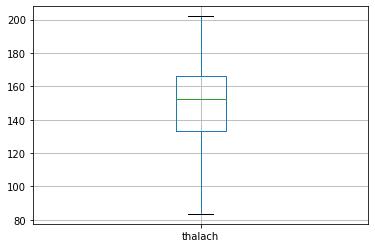

In [36]:
heart_dataset.boxplot(column=["thalach"])
plt.show

In [37]:
lowoldpeak,higholdpeak = removeOutlier(heart_dataset["oldpeak"])
heart_dataset["oldpeak"] = np.where(heart_dataset["oldpeak"]>higholdpeak,higholdpeak,heart_dataset["oldpeak"])
heart_dataset["oldpeak"] = np.where(heart_dataset["oldpeak"]<lowoldpeak,lowoldpeak,heart_dataset["oldpeak"])

<function matplotlib.pyplot.show(close=None, block=None)>

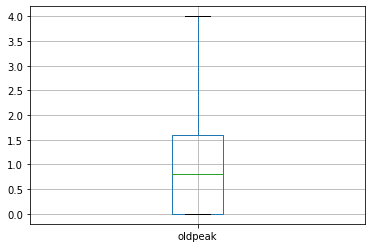

In [38]:
heart_dataset.boxplot(column=["oldpeak"])
plt.show

In [39]:
lowca,highca = removeOutlier(heart_dataset["ca"])
heart_dataset["ca"] = np.where(heart_dataset["ca"]>highca,highca,heart_dataset["ca"])
heart_dataset["ca"] = np.where(heart_dataset["ca"]<lowca,lowca,heart_dataset["ca"])

<function matplotlib.pyplot.show(close=None, block=None)>

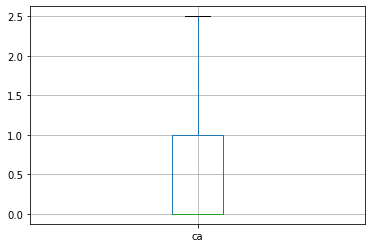

In [40]:
heart_dataset.boxplot(column=["ca"])
plt.show

In [81]:
lowthal,highthal = removeOutlier(heart_dataset["thal"])
heart_dataset["thal"] = np.where(heart_dataset["thal"]>highthal,highthal,heart_dataset["thal"])
heart_dataset["thal"] = np.where(heart_dataset["thal"]<lowthal,lowthal,heart_dataset["thal"])

<function matplotlib.pyplot.show(close=None, block=None)>

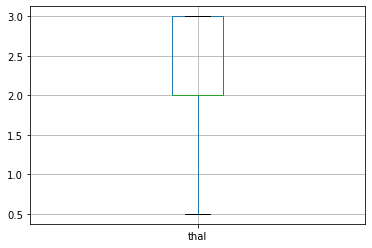

In [82]:
heart_dataset.boxplot(column=["thal"])
plt.show

In [83]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3.0,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3.0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3.0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3.0,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2.0,0


In [84]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [86]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3.0,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3.0,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3.0,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3.0,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2.0,0


In [87]:
heart_dataset = dataset.drop(columns=["chol","fbs"])

In [88]:
heart_dataset.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,1,0.821321,0,-0.060888,2,2,3.0,0
1,-0.158157,1,0,0.479107,0,0.255968,1,1.727137,0,0,3.0,0
2,1.716595,1,0,0.764688,1,-1.048692,1,1.301417,0,0,3.0,0
3,0.724079,1,0,0.936037,1,0.516900,0,-0.912329,2,1,3.0,0
4,0.834359,0,0,0.364875,1,-1.874977,0,0.705408,1,3,2.0,0


In [91]:
heart_dataset.to_csv(r"C:\Users\hp\Desktop\Major_project\ChronicDiseasePrediction\heart_disease\test.csv")